![Tux, the Linux mascot](CSGO.png)


# What is CS:GO?

If you have never heard of one games industry titans, it is probably you have being living under a rock for the past two decades or so. CS:GO predecessors, each in its own right, are marble of your age, from CS 1.6) earlier days as a Half Life mod, to its present form as a eSport behemoth, CS is undoubtedly one of games industry beacons of popularity. But what is CS?

Counter-Strike (CS) is a series of multiplayer first-person shooter video games in which teams of terrorists battle to perpetrate an act of terror (bombing, hostage-taking, assassination) while counter-terrorists try to prevent it (bomb defusal, hostage rescue), [source](https://en.wikipedia.org/wiki/Counter-Strike:_Global_Offensive). This is the factual description, but for its players it's a game that encorages high level strategies and bring back memories of fun times with friends at LAN parties, even if that is enfuriating some times

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report

import sys 

import sklearn
import numpy as np 
import os
import pandas as pd
import time

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.utils import io

## The Data

In [3]:
df = pd.read_csv('csgo_round_snapshots.csv')

In [4]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [6]:
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [7]:
df.isnull().sum().sum()

0

## Analyzing the data

<AxesSubplot:xlabel='round_winner', ylabel='count'>

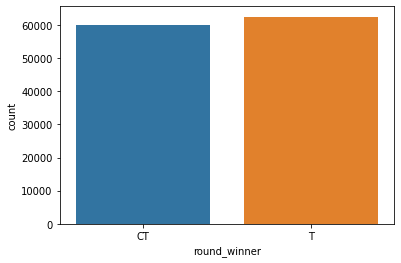

In [8]:
sns.countplot(df['round_winner'])

We can see that the data is quite balnced

<AxesSubplot:xlabel='map', ylabel='count'>

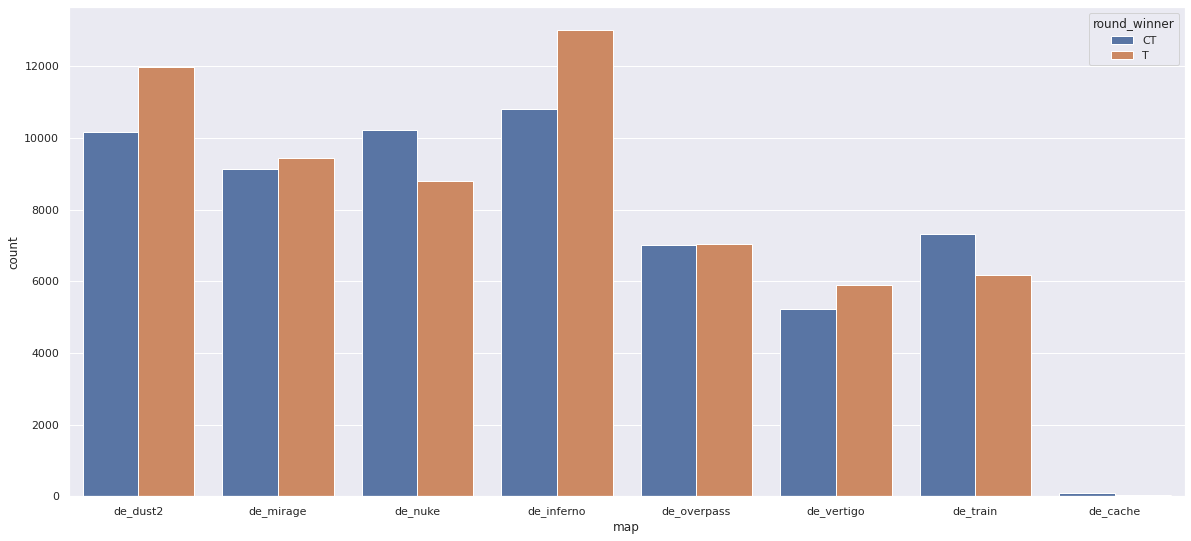

In [10]:
sns.set(rc={'figure.figsize':(20,9)})
sns.countplot(x="map",hue="round_winner",data=df)

In [ ]:
sns.pairplot(df,vars=["ct_health","t_health" ,"ct_armor" ,"t_armor"  ,"ct_money" ,"t_money" ])



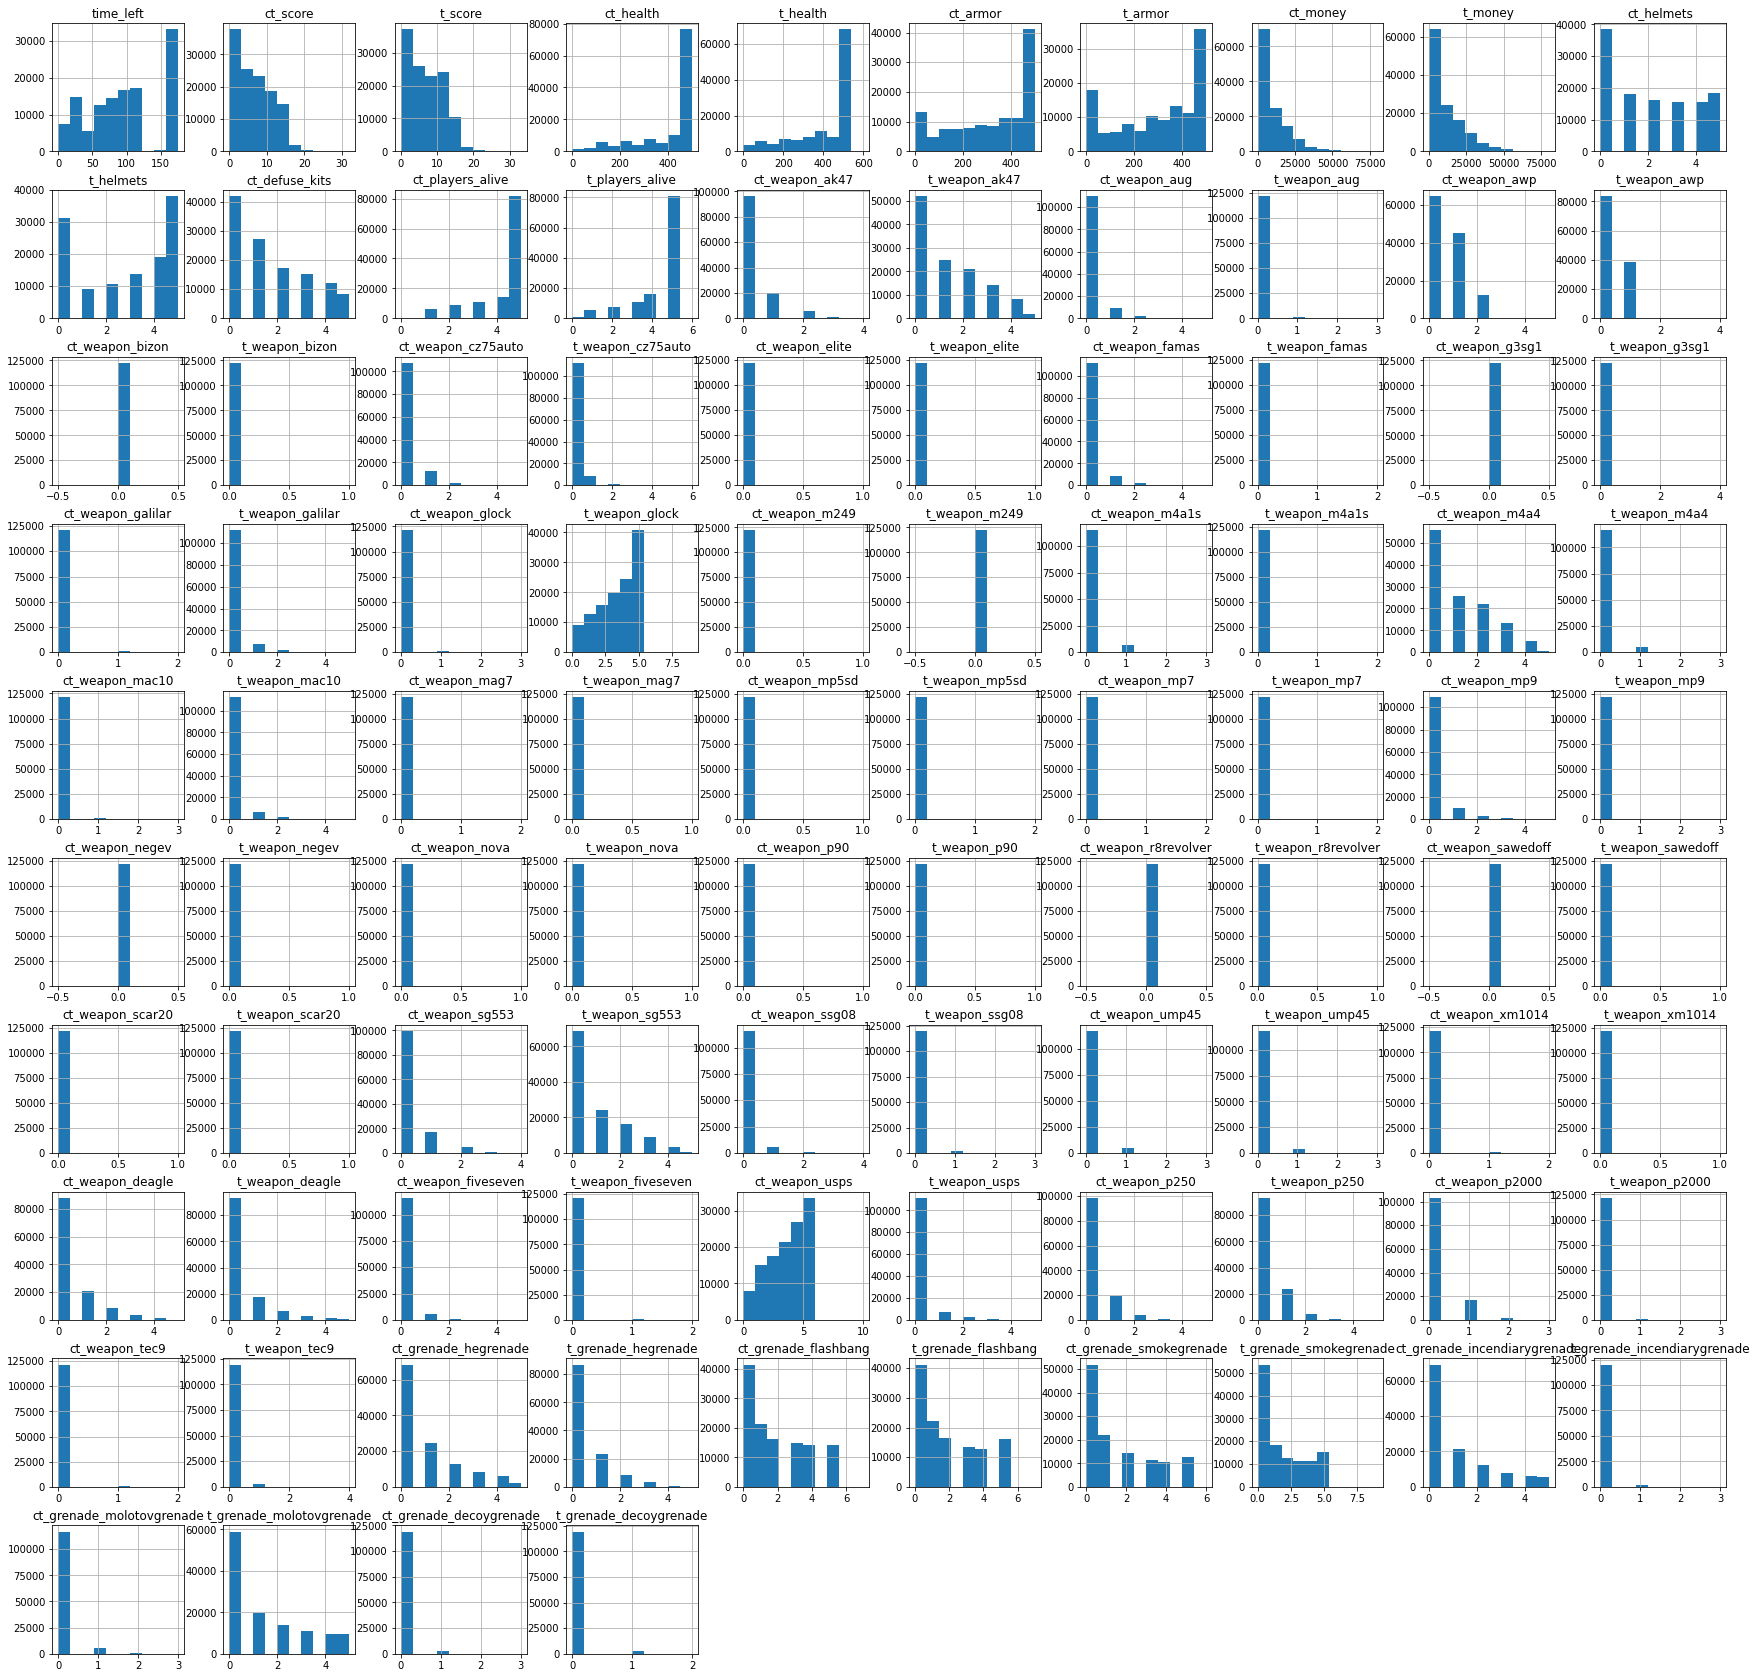

In [8]:
df.hist(figsize=(30,30));

In [9]:
df['round_winner'] = df['round_winner'].apply(lambda x: 1 if x == 'T' else 0)
df['round_winner'] = df['round_winner'].astype(str).astype(int)

## Prepricessing 

In [10]:
for column in df.columns:
    if len(df[column].unique()) == 1:
        df = df.drop([column], axis = 1)

In [11]:
ddf = pd.get_dummies(df)

label = ddf['round_winner']
data = ddf.drop('round_winner',axis=1)

X_train,X_test,y_train,y_test = train_test_split(data,label,test_size=0.2,random_state=0)
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state=0)


In [12]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)
X_validate = std_scaler.transform(X_validate)

In [13]:
from sklearn.dummy import DummyClassifier

dc_clf = DummyClassifier(strategy="most_frequent")

dc_clf.fit(X_train,y_train)
score = dc_clf.score(X_validate,y_validate)
print("dummy classifier:{}".format(score))

dummy classifier:0.5102113754722761


In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=10)

knn_clf.fit(X_train,y_train)
score = knn_clf.score(X_validate,y_validate)
print("knn:{}".format(score))

knn:0.7993464719697744


In [15]:
from sklearn.linear_model import LinearRegression

lr_clf =  LinearRegression()

lr_clf.fit(X_train,y_train)
score = lr_clf.score(X_validate,y_validate)
print("Linear Regression :{}".format(score))

Linear Regression :-4.782729116670727e+16


In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000,n_jobs=-1)

rf_clf.fit(X_train,y_train)
score = rf_clf.score(X_validate,y_validate)
print("random forest :{}".format(score))

random forest :0.8720004084550189


In [24]:
params = {
    'min_samples_split' : range(2,10,3),
    'min_samples_leaf' : range(0,4,1)
}
gs = GridSearchCV(rf_clf,params,cv=5)

gs.fit(X_train,y_train)
score = gs.score(X_validate,y_validate)
print("improved random forest :{}".format(score))

improved random forest :0.8721025222097416


## testing the data

In [25]:
score = gs.score(X_test,y_test)
print("random forest :{}".format(score))

random forest :0.8688015684993056


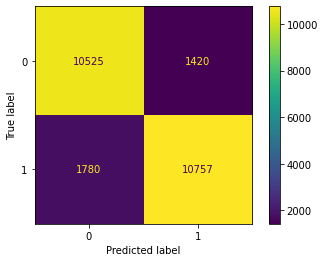

In [26]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf_clf,X_test,y_test)

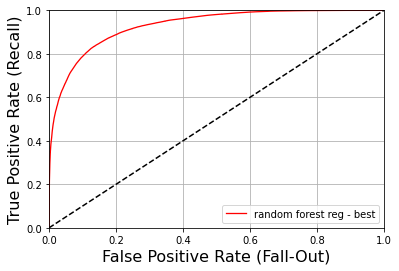

In [27]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

y_prob = cross_val_predict(rf_clf, X_train, y_train, cv=3, method="predict_proba")
fpr_reg2, tpr_reg2, thresholds_reg = roc_curve(y_train,y_prob[:,1])

def plot_roc_curve(fpr, tpr, label=None, color = 'b'):
    plt.plot(fpr, tpr, linewidth=1.3, label=label, alpha = 1, color=color)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)
    
plot_roc_curve(fpr_reg2, tpr_reg2, "random forest reg - best", 'r')
plt.legend(loc="lower right")
plt.show()

In [28]:
pred = rf_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     11945
           1       0.88      0.86      0.87     12537

    accuracy                           0.87     24482
   macro avg       0.87      0.87      0.87     24482
weighted avg       0.87      0.87      0.87     24482



## conclusion

Random forest gave us the best result, with accuracy of 88%.